https://bigquery.cloud.google.com/results/aqua-monitor:bquijob_39d68d0a_15ca2d48134?pli=1

SELECT sensor_id, year, count, integer(total_size/1e12) as total_size_TB from
(SELECT sensor_id, YEAR(sensing_time) as year, count(*) as count, sum(total_size) as total_size FROM [bigquery-public-data:cloud_storage_geo_index.landsat_index] group by sensor_id, year),
(SELECT 'S2' as sensor_id, YEAR(sensing_time) as year, count(*) as count, sum(total_size) as total_size FROM [bigquery-public-data:cloud_storage_geo_index.sentinel_2_index] group by year)




Simon: 
Note that this shows total __compressed__ file size, and only works for the datasets that are mirrored in the Cloud Public Datasets, which are just Landsat and S2 at this point. Also, the above double-counts Landsat, as the Cloud Datasets currently store both pre-collection and C1 Landsat.
The easiest way to obtain the __uncompressed__ dataset size in general is to multiply the asset dimensions by the number of assets in a collection, and multiply the result by the number of bytes in a pixel (1, 2, or 4).

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('../data/scenes-per-sensor.csv')

In [3]:
data

,sensor_id,year,count,total_size_TB
0,TM,1992,54524,6
1,ETM,2005,58915,10
2,TM,2004,81034,10
3,TM,2000,45912,5
4,TM,1999,76792,9
5,ETM,2004,64310,11
6,MSS,1975,53896,1
7,TM,1985,25949,3
8,MSS,1981,54509,1
9,MSS,1994,30096,0


In [4]:
data = data[data.sensor_id != 'TIRS']

In [5]:
plot_data = data.pivot('year', 'sensor_id')['count']

plot_data

sensor_id,ASTER,C-SAR,ETM,HYPERION,MSI,MSS,OLI,TM
year,,,,,,,,
1972,NaN,NaN,NaN,NaN,NaN,20430.0,NaN,NaN
1973,NaN,NaN,NaN,NaN,NaN,46136.0,NaN,NaN
1974,NaN,NaN,NaN,NaN,NaN,38559.0,NaN,NaN
1975,NaN,NaN,NaN,NaN,NaN,53896.0,NaN,NaN
1976,NaN,NaN,NaN,NaN,NaN,54970.0,NaN,NaN
1977,NaN,NaN,NaN,NaN,NaN,46628.0,NaN,NaN
1978,NaN,NaN,NaN,NaN,NaN,48627.0,NaN,NaN
1979,NaN,NaN,NaN,NaN,NaN,52736.0,NaN,NaN
1980,NaN,NaN,NaN,NaN,NaN,51715.0,NaN,NaN


In [6]:
data['count'].sum()

11328167

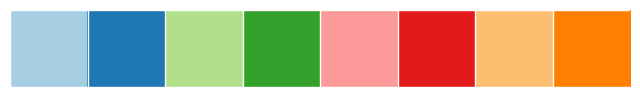

In [7]:
palette = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']
sns.set_palette(palette)

sns.palplot(palette)

In [8]:
sensors = ['MSS', 'TM', 'ETM', 'ASTER', 'OLI', 'C-SAR', 'MSI']
plot_data = plot_data[sensors]

In [9]:
plot_data

sensor_id,MSS,TM,ETM,ASTER,OLI,C-SAR,MSI
year,,,,,,,
1972,20430.0,NaN,NaN,NaN,NaN,NaN,NaN
1973,46136.0,NaN,NaN,NaN,NaN,NaN,NaN
1974,38559.0,NaN,NaN,NaN,NaN,NaN,NaN
1975,53896.0,NaN,NaN,NaN,NaN,NaN,NaN
1976,54970.0,NaN,NaN,NaN,NaN,NaN,NaN
1977,46628.0,NaN,NaN,NaN,NaN,NaN,NaN
1978,48627.0,NaN,NaN,NaN,NaN,NaN,NaN
1979,52736.0,NaN,NaN,NaN,NaN,NaN,NaN
1980,51715.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
!dir

 Volume in drive D is Data
 Volume Serial Number is 260F-715C

 Directory of D:\src\GitHub\thesis\01.1-introduction\notebooks

03/22/2017  01:12 PM    <DIR>          .
03/22/2017  01:12 PM    <DIR>          ..
03/07/2017  05:25 PM    <DIR>          .ipynb_checkpoints
03/08/2017  02:02 AM           609,045 hyperion.ipynb
03/22/2017  01:12 PM           100,526 scenes.ipynb
02/27/2017  08:36 PM           169,674 transmittance.ipynb
               3 File(s)        879,245 bytes
               3 Dir(s)  110,435,610,624 bytes free


In [10]:
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]

# print(font_names)

mpl.rcParams['font.family'] = 'Arial'

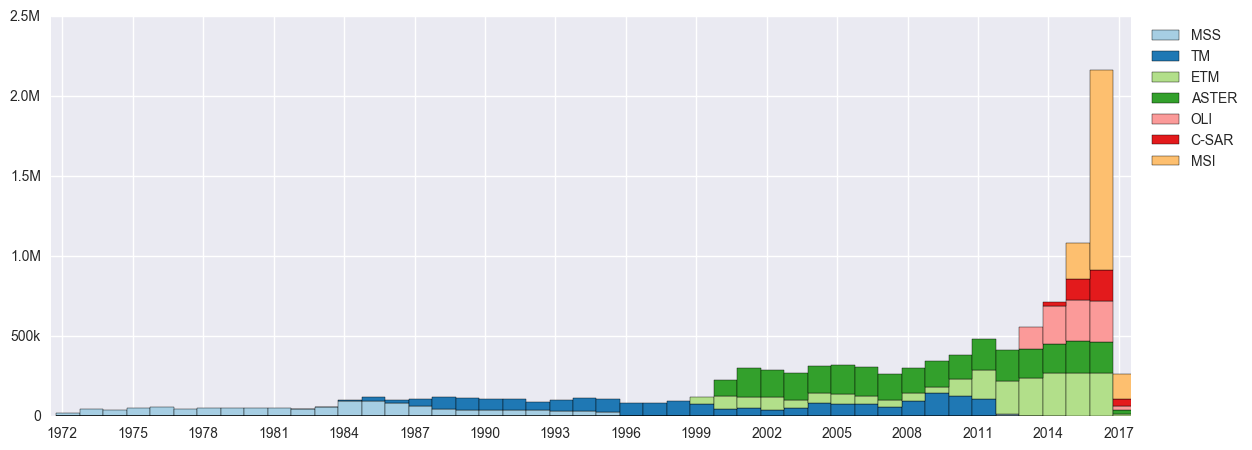

In [11]:
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FuncFormatter

def human_format(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    
    if magnitude > 1:
        fmt = '%.1f%s'
    else: 
        fmt = '%d%s'
    
    return fmt % (num, ['', 'k', 'M', 'G', 'T', 'P'][magnitude])

formatter = FuncFormatter(human_format)

sns.set_style('dark')

fig = plt.figure()
ax = plot_data.plot(kind='bar', stacked=True, figsize=(12,4), ax=fig.gca())
ax.yaxis.set_major_formatter(formatter)
for container in ax.containers:
    plt.setp(container, width=1)
ax.yaxis.grid()
ax.xaxis.grid()

ax.set_xlabel('')
ax.set_position([0.1,0.1,0.9,1.0])
plt.legend(title='', bbox_to_anchor=(1.11, 1), loc='upper right', ncol=1)

step = 3
ax.set_xticklabels(np.arange(1972, 2017 + 1, step), rotation=0)
ax.set_xticks(np.arange(0, 2017 - 1972 + 1, step))

#ax.tick_params(direction='out', pad=7)

ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

In [20]:
pdf = PdfPages('../figures/scenes-per-year.pdf')
pdf.savefig(figure=fig, bbox_inches='tight')
pdf.close()

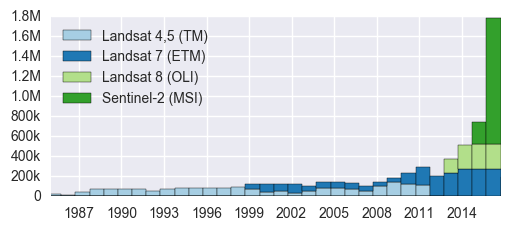

In [58]:
sns.set_style('dark')

fig = plt.figure()

series = ['Landsat 4,5 (TM)', 'Landsat 7 (ETM)', 'Landsat 8 (OLI)', 'Sentinel-2 (MSI)']

sensors = ['TM', 'ETM', 'OLI', 'MSI']

ax = plot_data[sensors].plot(kind='bar', stacked=True, figsize=(5,1.8), ax=fig.gca())
ax.yaxis.set_major_formatter(formatter)
for container in ax.containers:
    plt.setp(container, width=1)
ax.yaxis.grid()
ax.xaxis.grid()

ax.set_xlabel('')
ax.set_position([0.1,0.1,0.9,1.0])
plt.legend(title='', bbox_to_anchor=(0, 1), loc='upper left', ncol=1, labels=series)

step = 3
ax.set_xticklabels(np.arange(1972, 2017 + 1, step), rotation=0)
ax.set_xticks(np.arange(0, 2017 - 1972 + 1, step))

plt.xlim(13, 44.75)

#ax.tick_params(direction='out', pad=7)

ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

In [61]:
plot_data[sensors].sum()

sensor_id
TM     1969541.0
ETM    2184056.0
OLI     909212.0
MSI    1632576.0
dtype: float64

In [59]:
pdf = PdfPages('../figures/scenes-per-year-landsat-sentinel2.pdf')
pdf.savefig(figure=fig, bbox_inches='tight')
pdf.close()